## Import required modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from keras.models import load_model
import datetime
import warnings
warnings.filterwarnings('ignore')

## Read image data using Keras Image Data Generator

In [2]:
datagen = ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            rotation_range=45)

trainData = datagen.flow_from_directory(directory=r'Images\Train',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(180,180),
                                        class_mode='categorical')

testData = datagen.flow_from_directory(directory=r'Images\Test',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(180,180),
                                        class_mode='categorical')

valData = datagen.flow_from_directory(directory=r'Images\Val',
                                        batch_size=32,
                                        shuffle=False,
                                        target_size=(180,180),
                                        class_mode='categorical')

print('Train Data Labels :', trainData.class_indices)
print('Test Data Labels :', testData.class_indices)
print('Validation Data Labels :', valData.class_indices)

Found 1500 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Train Data Labels : {'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}
Test Data Labels : {'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}
Validation Data Labels : {'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}


## Model Initialization

#### Load VGG Model

In [3]:
vgg19 = VGG19(include_top=False, weights='imagenet', input_shape=(180,180,3))
for layer in vgg19.layers:
    layer.trainable = False

#### Add flatten and Dense layers

In [4]:
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 256)               3277056   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 23,302,211
Trainable params: 3,277,827
Non-trainable params: 20,024,384
_________________________________________________________________


## Model Training

In [5]:
tensorboard = TensorBoard(log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"), histogram_freq=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto', verbose=1)
checkpoint = ModelCheckpoint(filepath=r'models/vgg19_bestModel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit_generator(generator=trainData, epochs=20, validation_data=valData, callbacks=[checkpoint])

Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 23.6060 - accuracy: 0.6093
Epoch 1: val_loss improved from inf to 6.47080, saving model to models\vgg19_bestModel.hdf5
47/47 [==============================] - 35s 615ms/step - loss: 23.6060 - accuracy: 0.6093 - val_loss: 6.4708 - val_accuracy: 0.6000
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 3.3222 - accuracy: 0.7460
Epoch 2: val_loss improved from 6.47080 to 0.34393, saving model to models\vgg19_bestModel.hdf5
47/47 [==============================] - 24s 499ms/step - loss: 3.3222 - accuracy: 0.7460 - val_loss: 0.3439 - val_accuracy: 0.8333
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 0.9392 - accuracy: 0.8913
Epoch 3: val_loss improved from 0.34393 to 0.11685, saving model to models\vgg19_bestModel.hdf5
47/47 [==============================] - 24s 500ms/step - loss: 0.9392 - accuracy: 0.8913 - val_loss: 0.1168 - val_accuracy: 0.9667
Epoch 4/20
47/47 [==================

## Plotting accuracy and loss graphs

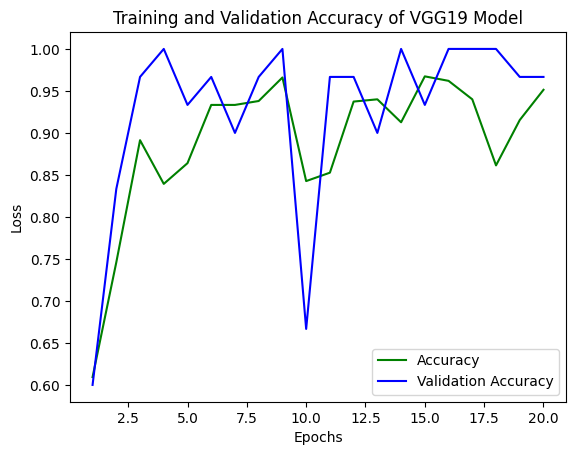

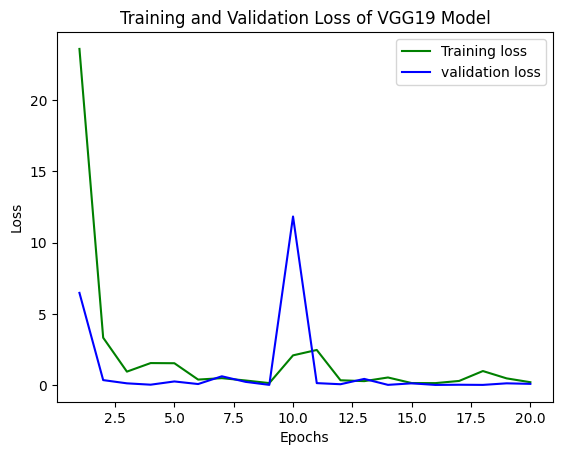

In [6]:
# Training and Validation Accuracy Graph
train = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Accuracy')
plt.plot(epochs, val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy of VGG19 Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Training and Validation Loss Graph
train = history.history['loss']
val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, train, 'g', label='Training loss')
plt.plot(epochs, val, 'b', label='validation loss')
plt.title('Training and Validation Loss of VGG19 Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluating Fully Trained VGG-19 Model

Training Data Metrics :
Accuracy Score : 0.9426666666666667
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       500
           1       1.00      0.98      0.99       500
           2       0.86      0.99      0.92       500

    accuracy                           0.94      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.95      0.94      0.94      1500



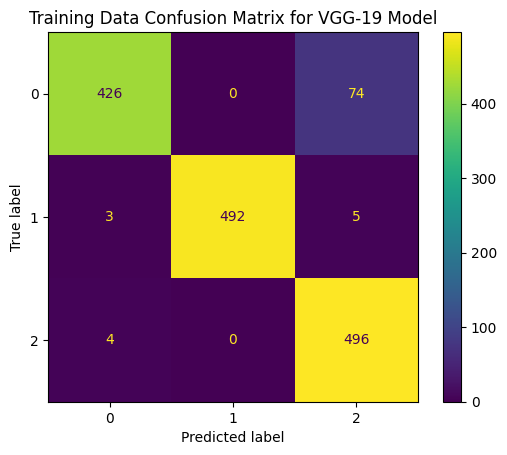





Validation Data Metrics :
Accuracy Score : 0.9666666666666667
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



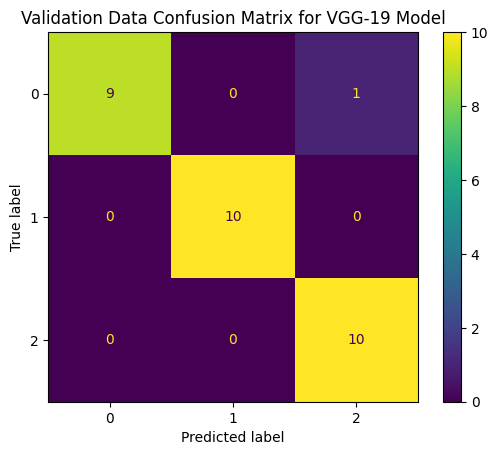





Testing Data Metrics :
Accuracy Score : 0.9166666666666666
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       100
           1       0.99      0.94      0.96       100
           2       0.83      1.00      0.91       100

    accuracy                           0.92       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



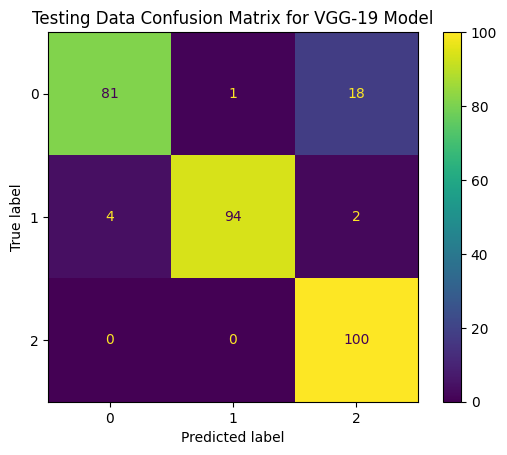

In [7]:
# Metrics used for evaluation:
# Accuracy Score
# Classification Report (Precision, Recall, F1 Score)
# Confusion Matrix

# Make predictions
testPred = np.argmax(model.predict_generator(testData), axis=1)
trainPred = np.argmax(model.predict_generator(trainData), axis=1)
valPred = np.argmax(model.predict_generator(valData), axis=1)

# Evaluating Training Data
print('Training Data Metrics :')
print('Accuracy Score :', accuracy_score(trainData.labels, trainPred))
creport = classification_report(trainData.labels, trainPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(trainData.labels, trainPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for VGG-19 Model')
plt.show()

# Evaluating Validation Data
print('\n\n\n')
print('Validation Data Metrics :')
print('Accuracy Score :', accuracy_score(valData.labels, valPred))
creport = classification_report(valData.labels, valPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(valData.labels, valPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for VGG-19 Model')
plt.show()

# Evaluating Testing Data
print('\n\n\n')
print('Testing Data Metrics :')
print('Accuracy Score :', accuracy_score(testData.labels, testPred))
creport = classification_report(testData.labels, testPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(testData.labels, testPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for VGG-19 Model')
plt.show()

model.save(r'models/vgg19_FullyTrained.hdf5')
model.save_weights(r'models/vgg19_FullyTrained_weights.hdf5')

## Evaluating Best Saved VGG-19 Model

Training Data Metrics :
Accuracy Score : 0.97
Classification Report :
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       500
           1       0.98      1.00      0.99       500
           2       0.96      0.96      0.96       500

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



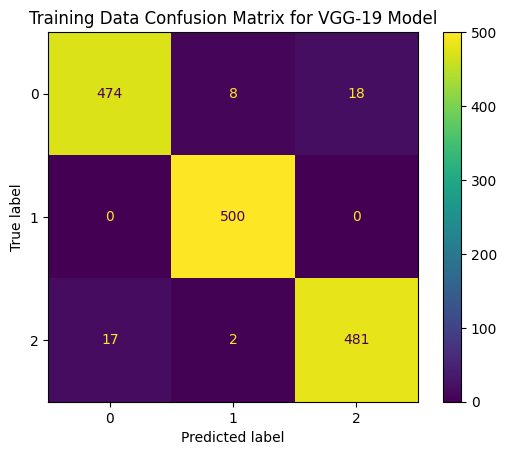





Validation Data Metrics :
Accuracy Score : 0.9666666666666667
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



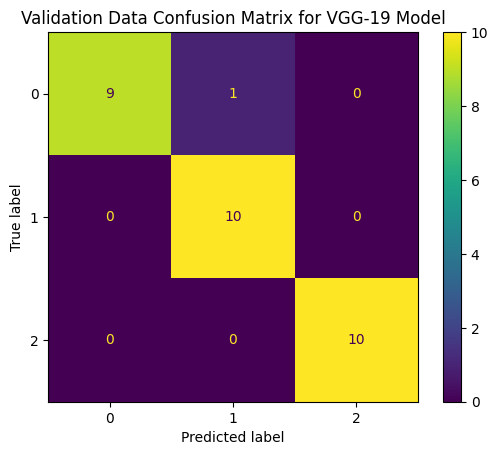





Testing Data Metrics :
Accuracy Score : 0.9666666666666667
Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.97      0.99      0.98       100
           2       0.98      0.94      0.96       100

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



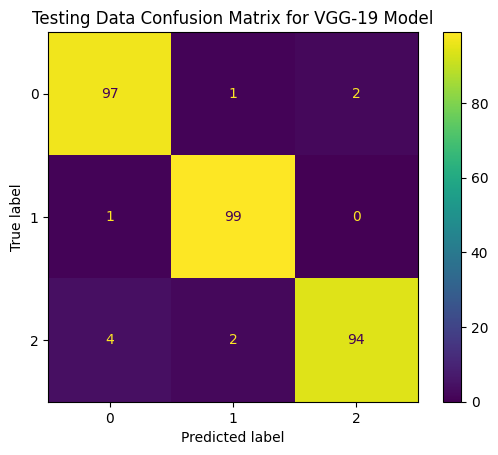

In [8]:
# Metrics used for evaluation:
# Accuracy Score
# Classification Report (Precision, Recall, F1 Score)
# Confusion Matrix

# Load the best model and save the weights of it
model = load_model(r'models/vgg19_bestModel.hdf5')
model.save_weights(r'models/vgg19_bestModel_weights.hdf5')

# Make predictions
testPred = np.argmax(model.predict_generator(testData), axis=1)
trainPred = np.argmax(model.predict_generator(trainData), axis=1)
valPred = np.argmax(model.predict_generator(valData), axis=1)

# Evaluating Training Data
print('Training Data Metrics :')
print('Accuracy Score :', accuracy_score(trainData.labels, trainPred))
creport = classification_report(trainData.labels, trainPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(trainData.labels, trainPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Training Data Confusion Matrix for VGG-19 Model')
plt.show()

# Evaluating Validation Data
print('\n\n\n')
print('Validation Data Metrics :')
print('Accuracy Score :', accuracy_score(valData.labels, valPred))
creport = classification_report(valData.labels, valPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(valData.labels, valPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Validation Data Confusion Matrix for VGG-19 Model')
plt.show()

# Evaluating Testing Data
print('\n\n\n')
print('Testing Data Metrics :')
print('Accuracy Score :', accuracy_score(testData.labels, testPred))
creport = classification_report(testData.labels, testPred)
print('Classification Report :\n' + creport)
cm = confusion_matrix(testData.labels, testPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Testing Data Confusion Matrix for VGG-19 Model')
plt.show()